In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Reading the dataset

base_data = pd.read_csv('C:/Users/supri/Downloads/Hospital data python/Data.csv')
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Data type of Scheduled day and appointment day are object ,so we'll convert the data type to date

In [4]:
base_data['ScheduledDay']=pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay']=pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [5]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
base_data['appointment_weekday']=base_data['AppointmentDay'].dt.dayofweek

In [7]:
base_data['appointment_weekday'].value_counts()

appointment_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

<Axes: ylabel='appointment_weekday'>

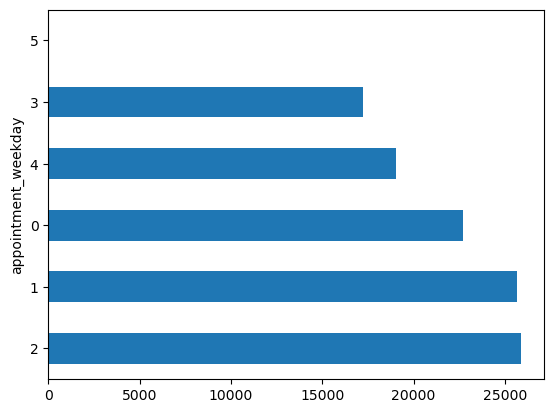

In [8]:
base_data['appointment_weekday'].value_counts().plot(kind='barh')

0-Monday,1-Tuesday,2-Wednesday,3-Thrusday,4-Friday,5-Saturday

In [9]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [10]:
base_data.isnull().sum()

PatientId              0
AppointmentID          0
Gender                 0
ScheduledDay           0
AppointmentDay         0
Age                    0
Neighbourhood          0
Scholarship            0
Hypertension           0
Diabetes               0
Alcoholism             0
Handicap               0
SMSReceived            0
NoShow                 0
appointment_weekday    0
dtype: int64

There are no null values

In [11]:
base_data['Age'].min()

-1

In [12]:
base_data['Age'].max()

115

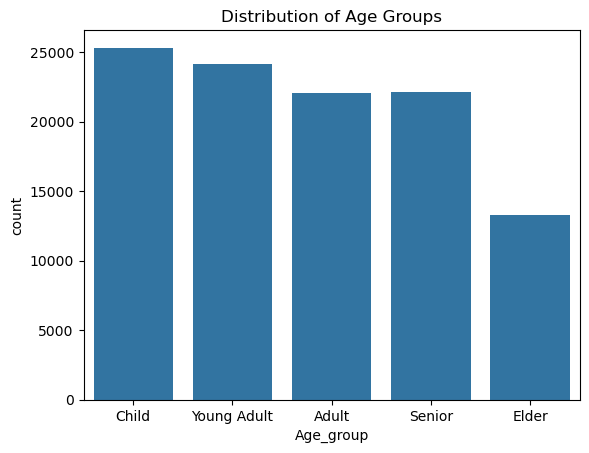

In [13]:
base_data['Age_group'] = pd.cut(base_data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elder'])

# Plot distribution of Age Groups
sns.countplot(x='Age_group', data=base_data)
plt.title('Distribution of Age Groups')
plt.show()

In [14]:
base_data.drop('Age',axis=1,inplace=True)

In [15]:
list(base_data.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'appointment_weekday',
 'Age_group']

In [16]:
base_data.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay', 'Neighbourhood'], axis=1, inplace=True)

In [17]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

Medical condition insight

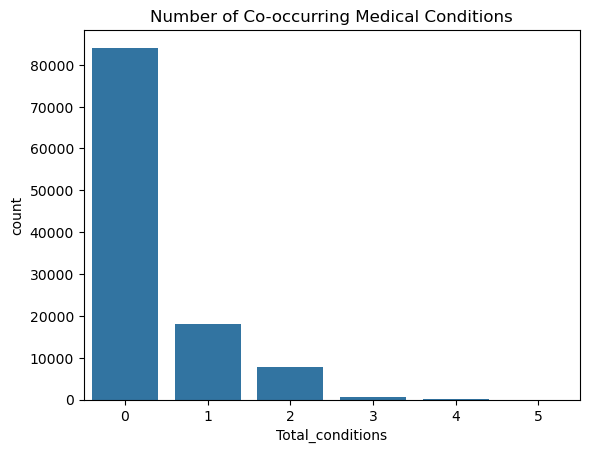

In [18]:
base_data['Total_conditions'] = base_data[['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']].sum(axis=1)

sns.countplot(x='Total_conditions', data=base_data)
plt.title('Number of Co-occurring Medical Conditions')
plt.show()

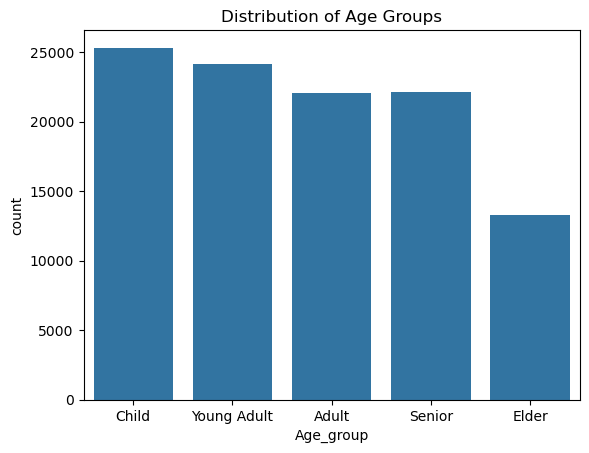

In [19]:
# Plot distribution of Age Groups
sns.countplot(x='Age_group', data=base_data)
plt.title('Distribution of Age Groups')
plt.show()

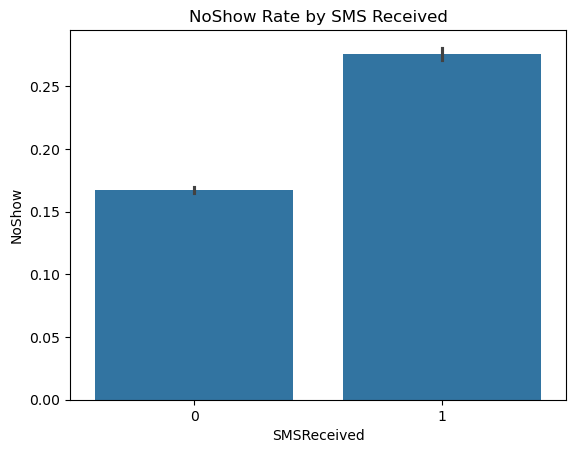

In [20]:
# Calculate show-up rate for those who received SMS vs those who didn’t
sms_effect = base_data.groupby('SMSReceived')['NoShow'].mean()

sns.barplot(x=base_data['SMSReceived'], y=base_data['NoShow'])
plt.title("NoShow Rate by SMS Received")
plt.show()

In [21]:
# Check for object dtype columns (categorical variables)
categorical_cols = base_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
base_data = pd.get_dummies(base_data, columns=categorical_cols, drop_first=True)

if 'Age_group' in base_data.columns:
    base_data = pd.get_dummies(base_data, columns=['Age_group'], drop_first=True)

# Recheck if all columns are numeric
print(base_data.dtypes)


Scholarship              int64
Hypertension             int64
Diabetes                 int64
Alcoholism               int64
Handicap                 int64
SMSReceived              int64
NoShow                   int32
appointment_weekday      int32
Total_conditions         int64
Gender_M                  bool
Age_group_Young Adult     bool
Age_group_Adult           bool
Age_group_Senior          bool
Age_group_Elder           bool
dtype: object


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
X = base_data.drop(columns=['NoShow'])
y = base_data['NoShow']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
base_data

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,appointment_weekday,Total_conditions,Gender_M,Age_group_Young Adult,Age_group_Adult,Age_group_Senior,Age_group_Elder
0,0,1,0,0,0,0,0,4,1,False,False,False,True,False
1,0,0,0,0,0,0,0,4,0,True,False,False,True,False
2,0,0,0,0,0,0,0,4,0,False,False,False,True,False
3,0,0,0,0,0,0,0,4,0,False,False,False,False,False
4,0,1,1,0,0,0,0,4,2,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,1,0,1,0,False,False,False,True,False
110523,0,0,0,0,0,1,0,1,0,False,False,False,True,False
110524,0,0,0,0,0,1,0,1,0,False,True,False,False,False
110525,0,0,0,0,0,1,0,1,0,False,False,True,False,False


In [26]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
y_pred = rf_model.predict(X_test)

In [28]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76     17669
           1       0.27      0.44      0.33      4437

    accuracy                           0.65     22106
   macro avg       0.55      0.57      0.55     22106
weighted avg       0.72      0.65      0.67     22106



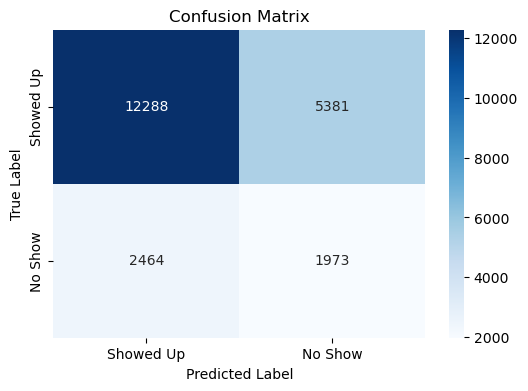

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Showed Up', 'No Show'], yticklabels=['Showed Up', 'No Show'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [31]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 657.6 kB/s eta 0:03:10
   ---------------------------------------- 0.3/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.8/124.9 MB 4.0 MB/s eta 0:00:31
   ---------------------------------------- 1.4/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 1.9/124.9 MB 6.5 MB/s eta 0:00:19
    --------------------------------------- 2.5/124.9 MB 7.2 MB/s eta 0:00:17
    --------------------------------------- 3.0/124.9 MB 7.8 MB/s eta 0:00:16
   - -------------------------------------- 3.6/124.9 MB 8.2 MB/s eta 0:00:15
   - -------------------------------------- 4.1/124.9 MB 8.5 MB/s eta 0:00:15
   - -------------------------------------- 4.6/124.9 MB 8.7 MB/s eta 0:00

In [32]:
import xgboost as xgb

XGBoost Accuracy: 0.80
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.62      0.01      0.01      4437

    accuracy                           0.80     22106
   macro avg       0.71      0.50      0.45     22106
weighted avg       0.76      0.80      0.71     22106



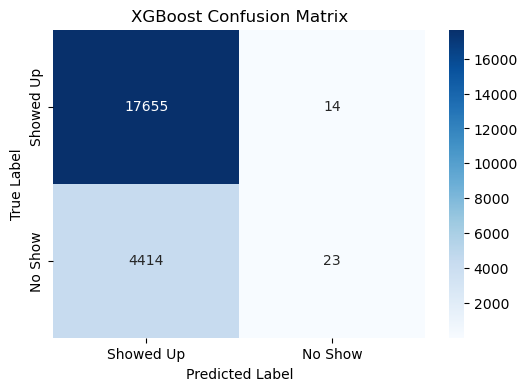

In [33]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Showed Up', 'No Show'], yticklabels=['Showed Up', 'No Show'])
plt.title("XGBoost Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

The models predict patient no-shows using Random Forest (71% accuracy) and XGBoost (80% accuracy). Random Forest correctly identified 1,973 no-shows but had 5,381 false positives. XGBoost had fewer false positives (14) but struggled with no-show predictions. Further models like LightGBM and SMOTE will be explored for improvement.